In [1]:
import os, glob

import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.font_manager as fm
import matplotlib as mpl

plt.rc('font', family='NanumGothic')
mpl.rcParams['axes.unicode_minus'] = False
plt.style.use('fivethirtyeight')

%matplotlib inline

## Track 2
trend_w_demo.csv: 온라인 가맹점 업종 정보

<u>Description</u>
> YM: 이용 연월(2019년 4월\~2020년 5월)  
Category: 이용 업종  
성별구분: 0(남성), 1(여성)  
연령대: 연령 구간. 알파벳 순서와 연령 순서는 무관
기혼스코어: 카드 이용 고객이 기혼일 확률  
유아자녀스코어: 카드 이용 고객이 유아자녀가 있을 확률  
초등학생자녀스코어: 카드 이용 고객이 초등학생 자녀가 있을 확률  
중고생자녀스코어: 카드 이용 고객이 중고생 자녀가 있을 확률  
대학생자녀스코어: 카드 이용 고객이 대학생 자녀가 있을 확률  
전업주부스코어: 카드 이용 고객이 전업주부일 확률  

In [10]:
pathList = glob.glob('../../raw/*')
trend_w_demo = pd.read_csv(pathList[-3], engine='python')
trend_w_demo.head(3)

,YM,Category,성별구분,연령대,기혼스코어,유아자녀스코어,초등학생자녀스코어,중고생자녀스코어,대학생자녀스코어,전업주부스코어
0,202005,할인점,0,F,high,low,high,mid,low,low
1,202005,취미,0,B,high,low,mid,mid,low,low
2,202005,오픈마켓/소셜,1,D,mid,mid,mid,mid,low,mid


In [11]:
def showCountplot(y, data, order=None, palette=None, title=None, 
                  xlabel=None, ylabel=None, figsize=(10, 6), yticks=None,
                  xticks=None, save=False):
    f = plt.figure(figsize=figsize)
    sns.countplot(y=y, data=data, order=order)
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    if yticks is not None:
        plt.yticks([i for i in range(data[y].nunique())], yticks)
    plt.title(title)
    plt.show()
    if save:
        f.savefig(f'./plots/{title}.png', dpi=300)

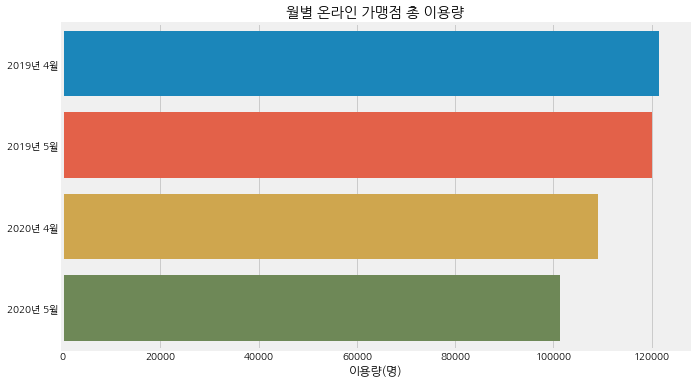

In [12]:

showCountplot(y='YM', data=trend_w_demo, order=trend_w_demo['YM'].value_counts().index,
             title='월별 온라인 가맹점 총 이용량', xlabel='이용량(명)',
             yticks=['2019년 4월', '2019년 5월', '2020년 4월', '2020년 5월'], save=True)

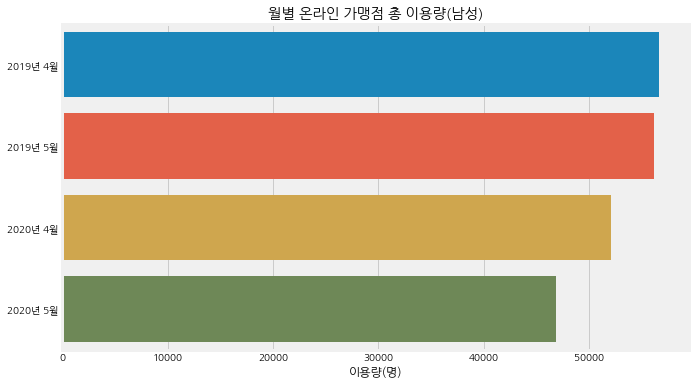

In [13]:
temp = trend_w_demo[trend_w_demo['성별구분']==0]
showCountplot(y='YM', data=temp, order=temp['YM'].value_counts().index,
             title='월별 온라인 가맹점 총 이용량(남성)', xlabel='이용량(명)',
             yticks=['2019년 4월', '2019년 5월', '2020년 4월', '2020년 5월'], save=True)

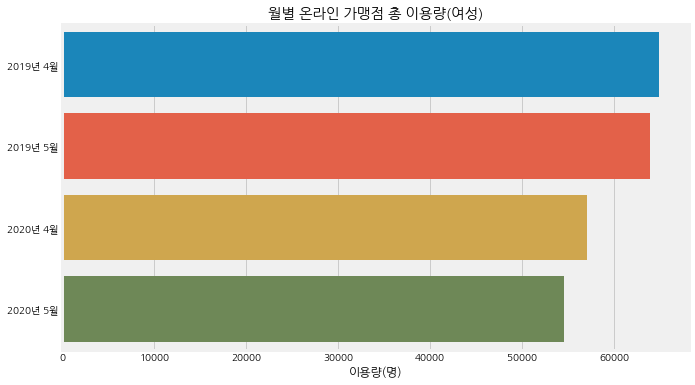

In [14]:
temp = trend_w_demo[trend_w_demo['성별구분']==1]
showCountplot(y='YM', data=temp, order=temp['YM'].value_counts().index,
             title='월별 온라인 가맹점 총 이용량(여성)', xlabel='이용량(명)',
             yticks=['2019년 4월', '2019년 5월', '2020년 4월', '2020년 5월'], save=True)

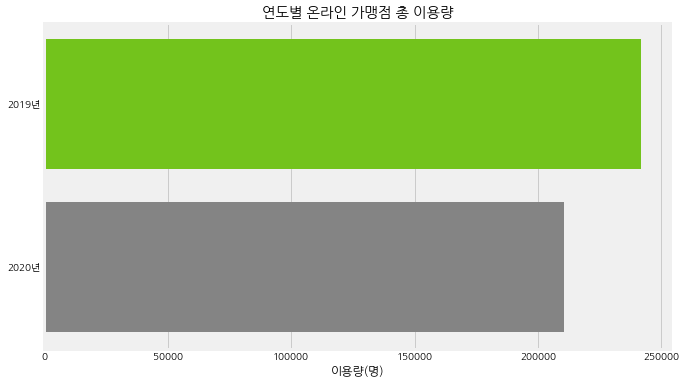

In [15]:
temp = trend_w_demo[['YM']].copy()
temp['YM'] = temp['YM'].apply(lambda x: str(x)[:4])

plt.figure(figsize=(10,6))
sns.countplot(y='YM', data=temp,
              order=temp['YM'].value_counts().index,
              palette=['#74DF00', '#848484'])
plt.yticks([i for i in range(2)], ['2019년', '2020년'])
plt.ylabel('')
plt.xlabel('이용량(명)')
plt.title('연도별 온라인 가맹점 총 이용량')
plt.show()

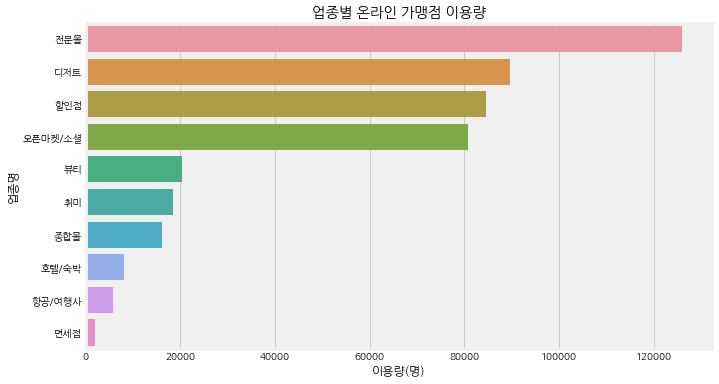

In [16]:
plt.figure(figsize=(10,6))
sns.countplot(y='Category', data=trend_w_demo, 
              order=trend_w_demo['Category'].value_counts().index)
plt.ylabel('업종명')
plt.xlabel('이용량(명)')
plt.title('업종별 온라인 가맹점 이용량')
plt.show()

In [17]:
trend_w_demo.groupby('성별구분').apply(lambda x: len(x))

성별구분
0    211702
1    240336
dtype: int64

In [21]:
density_sex = trend_w_demo.groupby(['Category', '성별구분']).apply(lambda x: len(x)).to_frame('Percentage').reset_index()
density_sex.loc[density_sex['성별구분']==0, 'Percentage'] /= 211702
density_sex.loc[density_sex['성별구분']==1, 'Percentage'] /= 240336
density_sex.head(6)

,Category,성별구분,Percentage
0,디저트,0,0.199885
1,디저트,1,0.197336
2,면세점,0,0.005172
3,면세점,1,0.004048
4,뷰티,0,0.032867
5,뷰티,1,0.056151


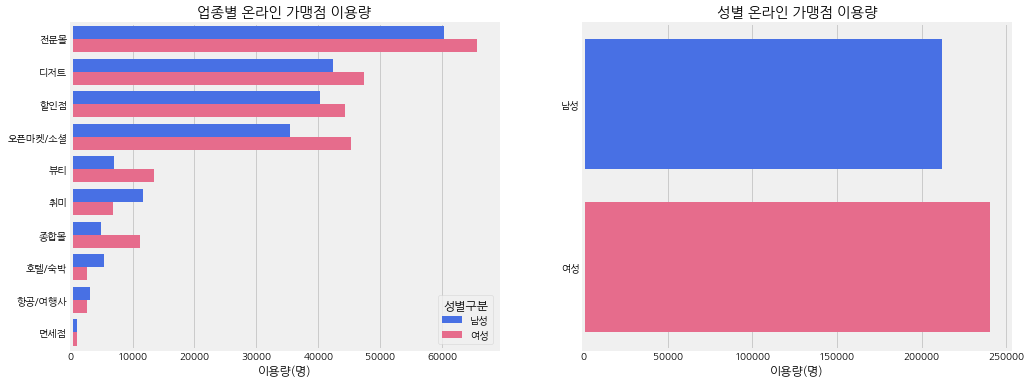

In [22]:
temp = trend_w_demo[['Category', '성별구분']].copy()
male_idx = temp[temp['성별구분'] == 0].index
temp['성별구분'] = '여성'
temp.loc[male_idx, '성별구분'] = '남성'

colors=['#2E64FE', '#FA5882']
f, ax = plt.subplots(1,2, figsize=(15,6))
sns.countplot(y='Category', hue='성별구분', data=temp, 
              order=temp['Category'].value_counts().index,
              palette=colors,
              ax=ax[0])
sns.countplot(y='성별구분', data=temp, palette=colors, ax=ax[1])
ax[0].set_title('업종별 온라인 가맹점 이용량')
ax[1].set_title('성별 온라인 가맹점 이용량')

ax[0].set_ylabel('')
ax[1].set_ylabel('')

ax[0].set_xlabel('이용량(명)')
ax[1].set_xlabel('이용량(명)')

plt.show()

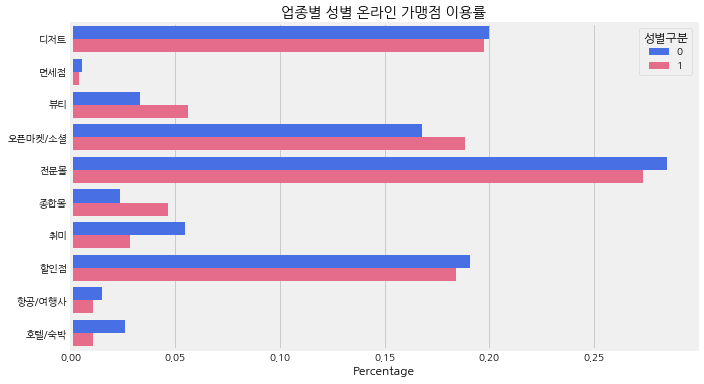

In [23]:
colors=['#2E64FE', '#FA5882']
plt.figure(figsize=(10, 6))
sns.barplot(y='Category', x='Percentage', hue='성별구분', data=density_sex, palette=colors)
plt.title('업종별 성별 온라인 가맹점 이용률')
plt.ylabel('')
plt.show()

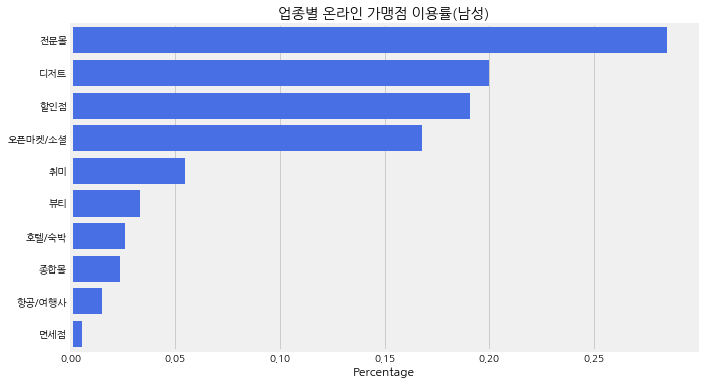

In [24]:
temp = density_sex[density_sex['성별구분']==0].sort_values(by='Percentage', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y='Category', x='Percentage', data=temp, color='#2E64FE')
plt.title('업종별 온라인 가맹점 이용률(남성)')
plt.ylabel('')
plt.show()

전문몰 > 디저트 > 할인점 > 오픈마켓/소셜 >>>

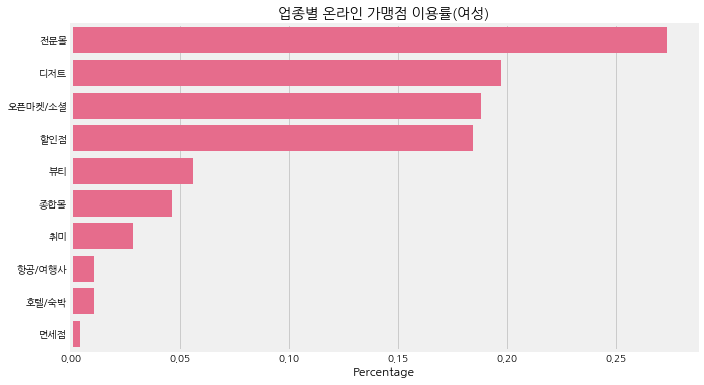

In [25]:
temp = density_sex[density_sex['성별구분']==1].sort_values(by='Percentage', ascending=False)
plt.figure(figsize=(10, 6))
sns.barplot(y='Category', x='Percentage', data=temp, color='#FA5882')
plt.title('업종별 온라인 가맹점 이용률(여성)')
plt.ylabel('')
plt.show()

전문몰 > 디저트 > 오픈마켓/소셜 > 할인점 >>>

Text(0.5, 0, '고객 수(명)')

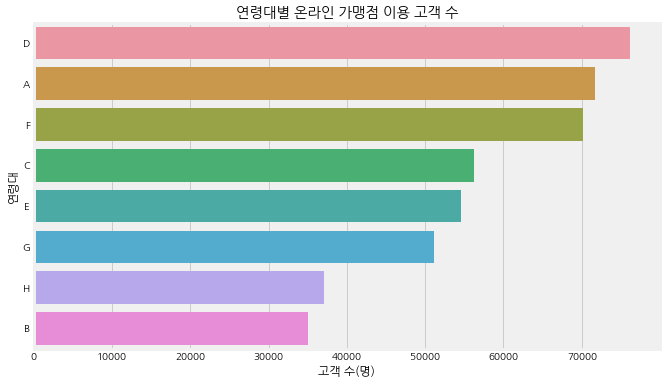

In [26]:
plt.figure(figsize=(10, 6))
sns.countplot(y='연령대', data=trend_w_demo,
             order=trend_w_demo['연령대'].value_counts().index)
plt.title('연령대별 온라인 가맹점 이용 고객 수')
plt.xlabel('고객 수(명)')

In [27]:
temp = trend_w_demo[['연령대', '기혼스코어']].copy()
temp['Frequency'] = temp.index.tolist()
temp_pct = (temp
            .groupby(['연령대','기혼스코어'])
            .count()
            .groupby(level=0)
            .apply(lambda x: 100 * x / float(x.sum())))

In [28]:
def showScore(feature='기혼스코어', hue='연령대', sex=None, hue_name=None, figsize=(10,6), save=False):
    '''
    어떤 범주별 어떤 스코어에 대한 응답자 비율 plot을 반환
    feature: string, 관찰할 스코어 변수
    hue: string, 구분할 범주형 변수
    hue_name: plot의 title에 표시되는 이름, None일 시 hue로 대체됨
    figsize: tuple, plot 크기
    save: 저장 여부
    '''
    if sex is not None:
        temp = trend_w_demo[trend_w_demo['성별구분']==sex][[hue, feature]]
    else:
        temp = trend_w_demo[[hue, feature]].copy()
    
    temp['Frequency'] = temp.index.tolist()
    temp_pct = (temp
            .groupby([hue, feature])
            .count()
            .groupby(level=0)
            .apply(lambda x: 100 * x / float(x.sum()))
            .reset_index())
    
    f = plt.figure(figsize=figsize)
    sns.barplot(x=hue, 
            y='Frequency', 
            hue=feature, 
            hue_order=['high', 'mid', 'low'],
            palette=['#FF0040', '#01DF01', '#0174DF'],
            data=temp_pct, 
            )
    plt.ylabel('응답자 비율(%)')
    if hue_name is None:
        if sex is None:
            plt.title(f'{hue}별 {feature}')
        else:
            if sex==0:
                plt.title(f'{hue}별 {feature}(남성)')
            else:
                plt.title(f'{hue}별 {feature}(여성)')
        plt.xlabel(hue)
    else:
        plt.title(f'{hue_name}별 {feature}')
        plt.xlabel(hue_name)
    if hue == '성별구분':
        plt.xticks([0,1], ['남성', '여성'])
    
    
    if save:
        if hue_name is None:
            f.savefig(f'./plots/{hue}별 {feature}.png', dpi=300)
        else:
            f.savefig(f'./plots/{hue_name}별 {feature}.png', dpi=300)

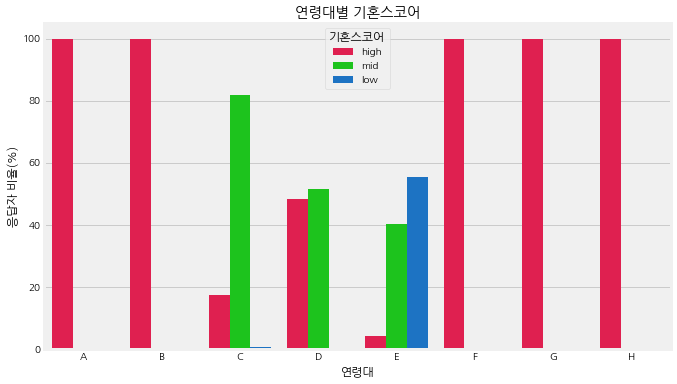

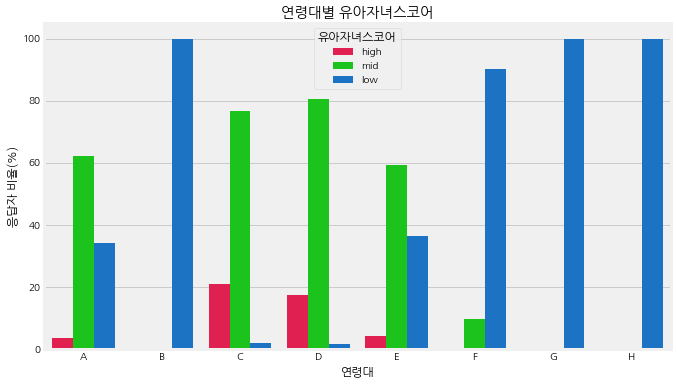

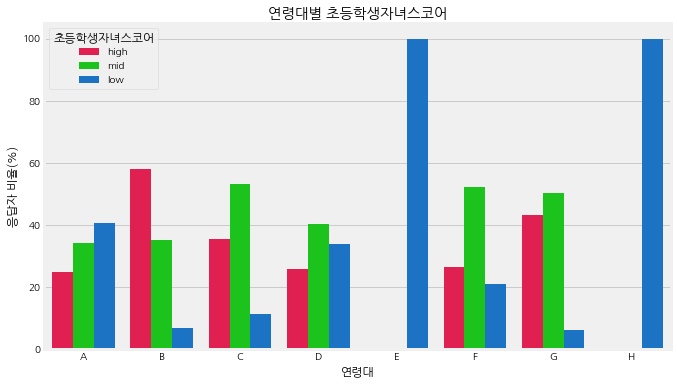

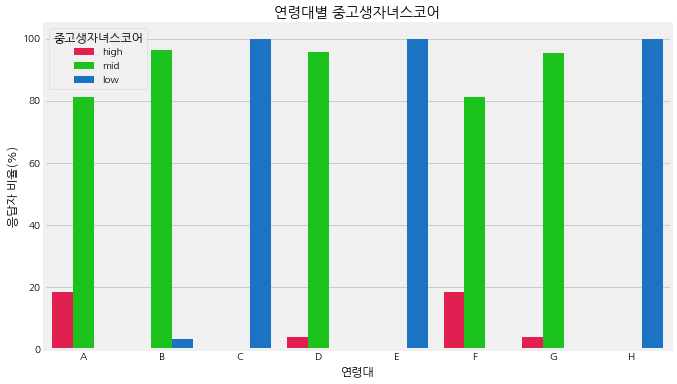

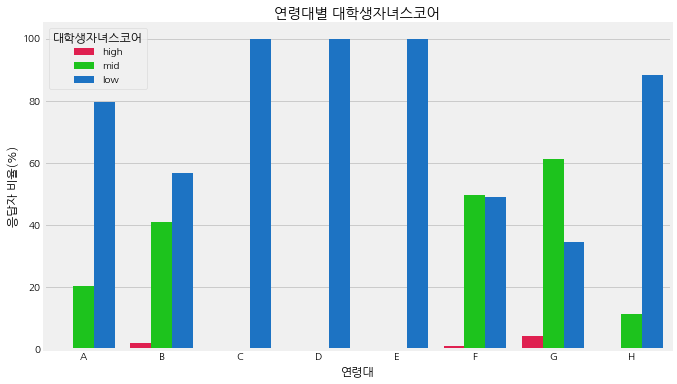

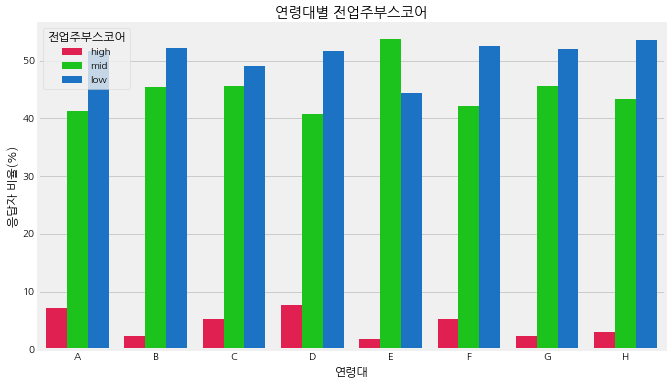

In [29]:
for score in list(trend_w_demo.columns[4:]):
    showScore(feature=score, hue='연령대', save=True)

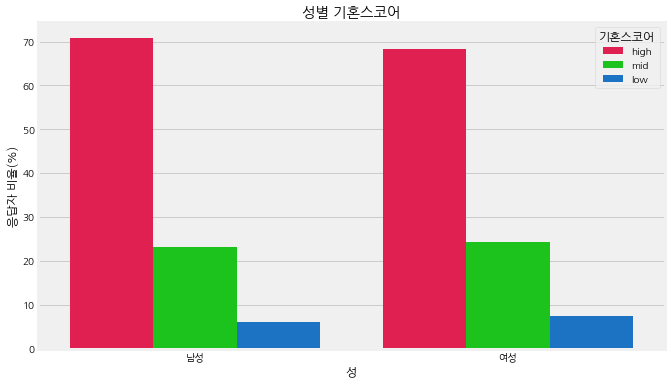

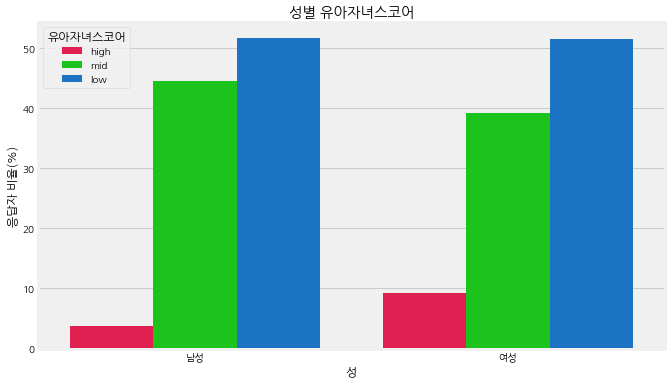

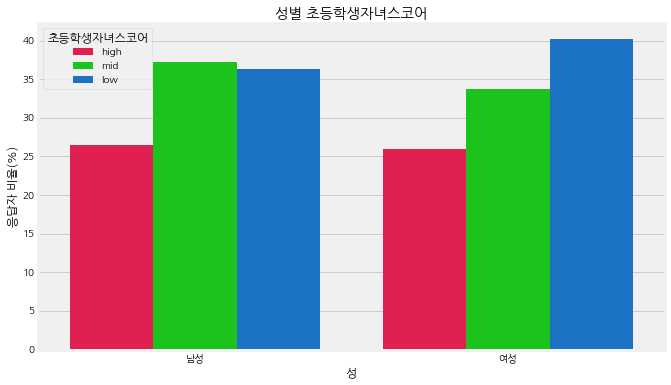

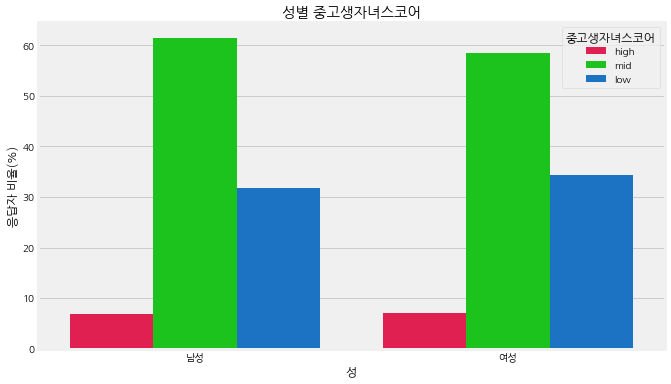

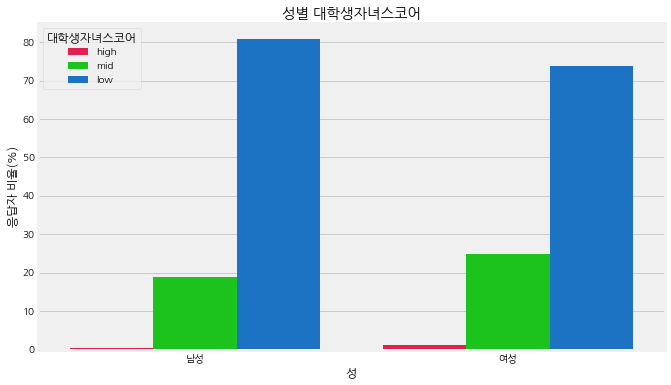

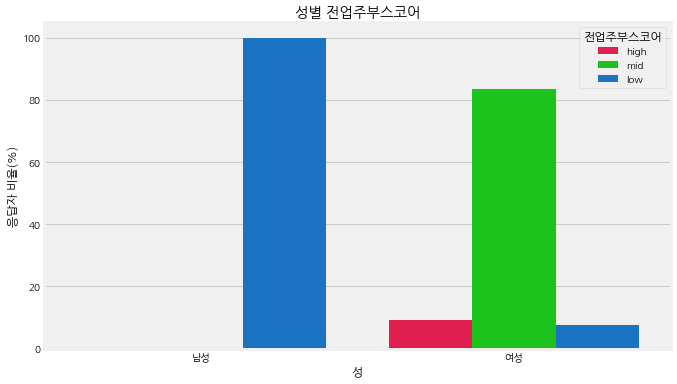

In [30]:
for score in list(trend_w_demo.columns[4:]):
    showScore(feature=score, hue='성별구분', hue_name='성', save=True)

### 코로나 시국에 따른 업종별 변화

* 이용변화량

In [31]:
temp = (trend_w_demo[trend_w_demo['YM'].isin([202005, 202006])]['Category'].value_counts()
        - trend_w_demo[trend_w_demo['YM'].isin([201905, 201906])]['Category'].value_counts()).to_frame('diff').reset_index()

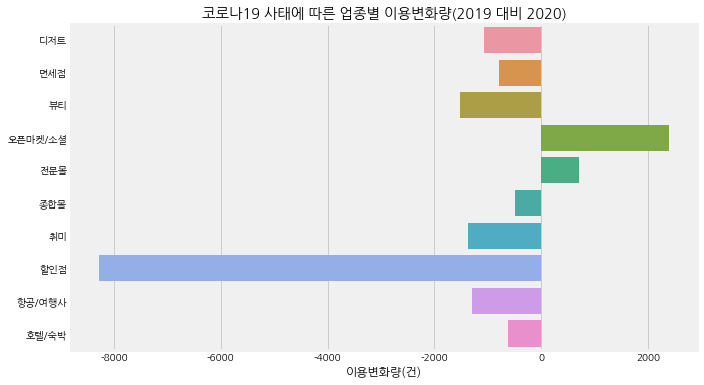

In [32]:
plt.figure(figsize=(10, 6))
sns.barplot(y='index', x='diff', data=temp)
plt.ylabel('')
plt.xlabel('이용변화량(건)')
plt.title('코로나19 사태에 따른 업종별 이용변화량(2019 대비 2020)')
plt.show()

여기서 봤을 때는 할인점이 떡락한걸로 보이지만

* 이용변화율

In [33]:
temp = (trend_w_demo[trend_w_demo['YM'].isin([202005, 202006])]['Category'].value_counts()
        / trend_w_demo[trend_w_demo['YM'].isin([201905, 201906])]['Category'].value_counts()).to_frame('ratio').reset_index()
temp['ratio'] -= 1

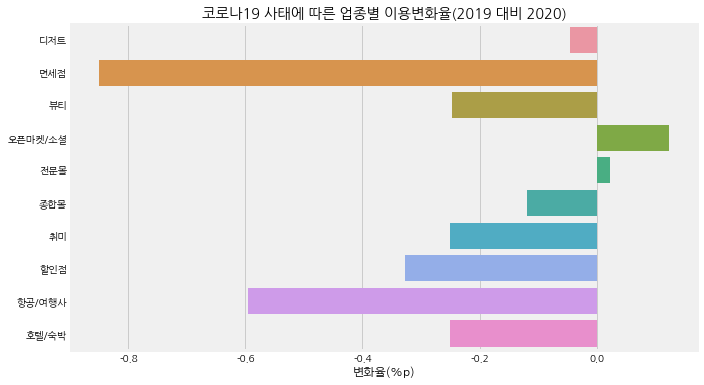

In [34]:
plt.figure(figsize=(10,6))
sns.barplot(y='index', x='ratio', data=temp)
plt.ylabel('')
plt.xlabel('변화율(%p)')
plt.title('코로나19 사태에 따른 업종별 이용변화율(2019 대비 2020)')
plt.show()

실제로는, 면세점, 항공/여행사가 가장 심하게 떡락  
떡락: 면세점, 항공/여행사  
락: 뷰티, 취미, 할인점, 호텔/숙박   
약진: 오픈마켓/소셜, 전문몰  

Text(0.5, 1.0, '오픈마켓/소셜 업종 연령 분포(2019 & 2020)')

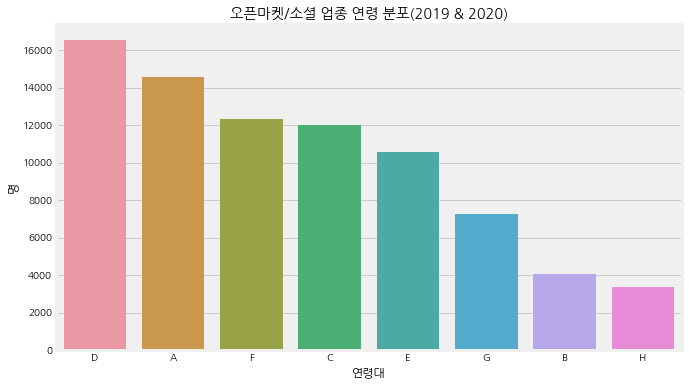

In [35]:
plt.figure(figsize=(10 ,6))
temp = trend_w_demo[trend_w_demo['Category']=='오픈마켓/소셜']['연령대'].value_counts().to_frame('명').reset_index()
sns.barplot(x='index', y='명', data=temp)
plt.xlabel('연령대')
plt.title('오픈마켓/소셜 업종 연령 분포(2019 & 2020)')

In [36]:
def plotAnnualDiff(Category='오픈마켓/소셜', save=False):
    trendMale = trend_w_demo[trend_w_demo['성별구분']==0]
    trendFemale = trend_w_demo[trend_w_demo['성별구분']==1]

    trend2020 = trendMale[trendMale['YM'].isin([202005, 202006])]
    trend2019 = trendMale[trendMale['YM'].isin([201905, 201906])]
    tempMale = (trend2020[trend2020['Category']==Category]['연령대'].value_counts() 
            / trend2019[trend2019['Category']==Category]['연령대'].value_counts() - 1).to_frame('ratio').reset_index()
    tempMale['성별구분'] = '남성'
    trend2020 = trendFemale[trendFemale['YM'].isin([202005, 202006])]
    trend2019 = trendFemale[trendFemale['YM'].isin([201905, 201906])]
    tempFemale = (trend2020[trend2020['Category']==Category]['연령대'].value_counts() 
            / trend2019[trend2019['Category']==Category]['연령대'].value_counts() - 1).to_frame('ratio').reset_index()
    tempFemale['성별구분'] = '여성'
    temp = pd.concat([tempMale, tempFemale])
    temp2 = (trend_w_demo[(trend_w_demo['Category']== c) & (trend_w_demo['YM'].isin([202004, 202005]))]
             .groupby(['연령대', '성별구분'])
             .apply(lambda x: len(x))
             .to_frame('인원수')
             .reset_index())
    temp2['성별구분'] = temp2['성별구분'].map({0:'남성', 1:'여성'})

    colors=['#2E64FE', '#FA5882']
    fig, ax = plt.subplots(1,2,figsize=(16, 6))
    sns.barplot(x='index', y='ratio', hue='성별구분', data=temp, palette=colors, ax=ax[0])
    sns.barplot(x='연령대', y='인원수', hue='성별구분', data=temp2, palette=colors, ax=ax[1])
    ax[0].set_xlabel('연령대')
    ax[0].set_ylabel('변화율(%p)')
    ax[1].set_ylabel('인원수(명)')
    
    ax[0].set_title(f'{Category} 업종 이용변화율(2019년 대비 2020년)')
    ax[1].set_title(f'{Category} 업종 연령별 이용자 수(2020년)')
    plt.suptitle(f'코로나19 사태에 따른 업종 이용 현황')
    plt.show()
    return fig

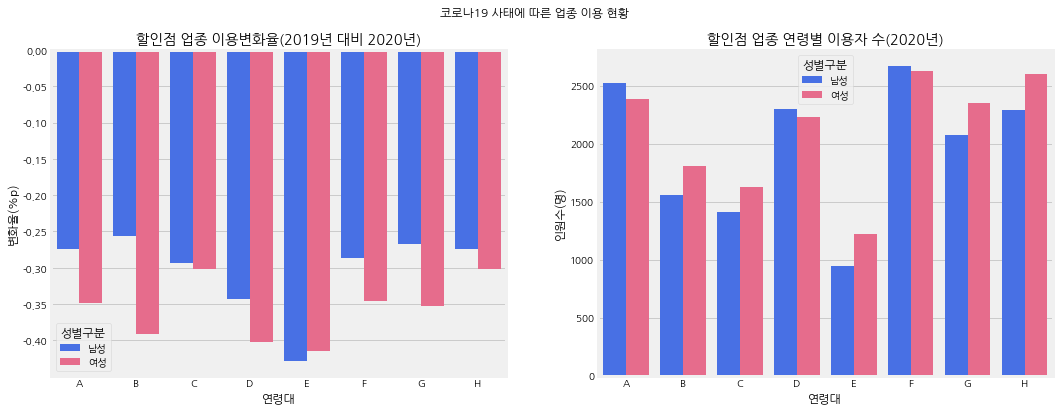

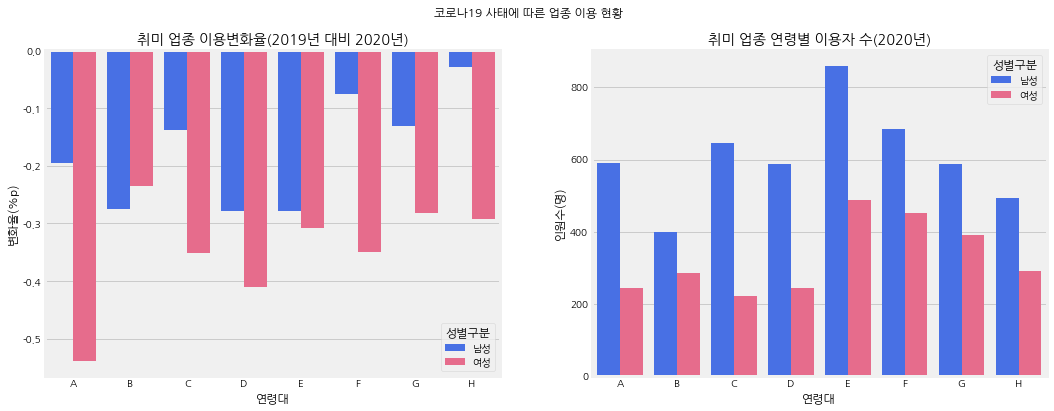

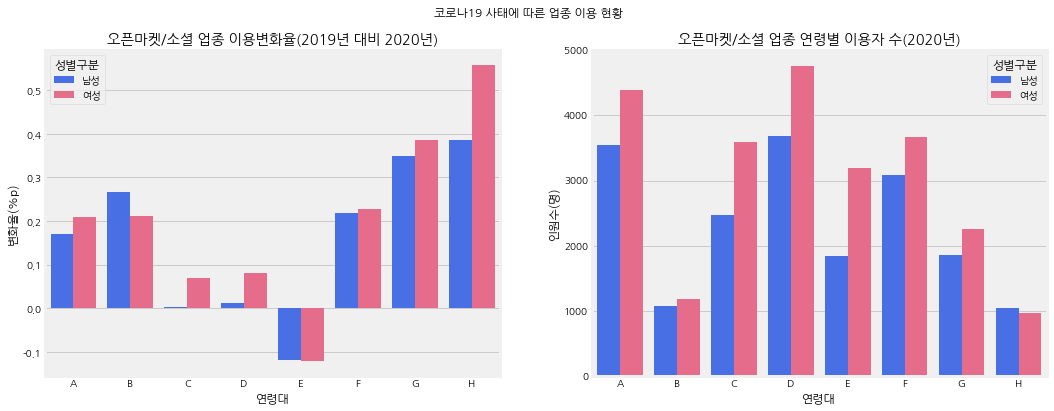

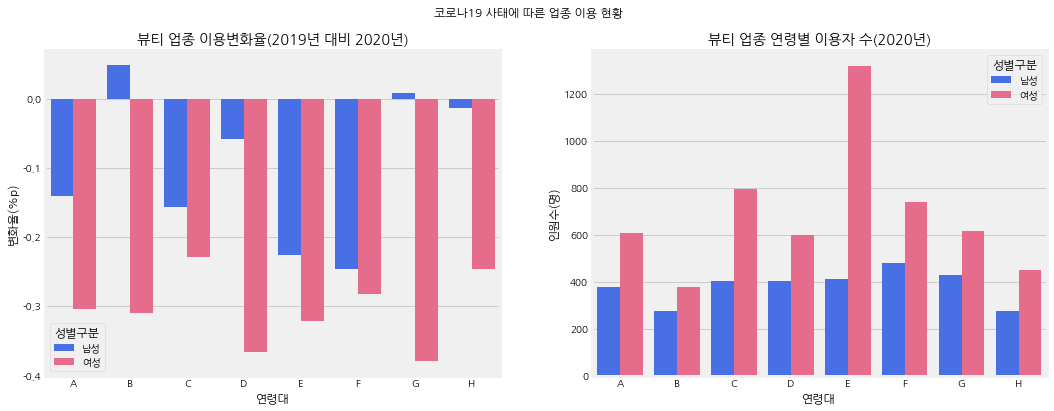

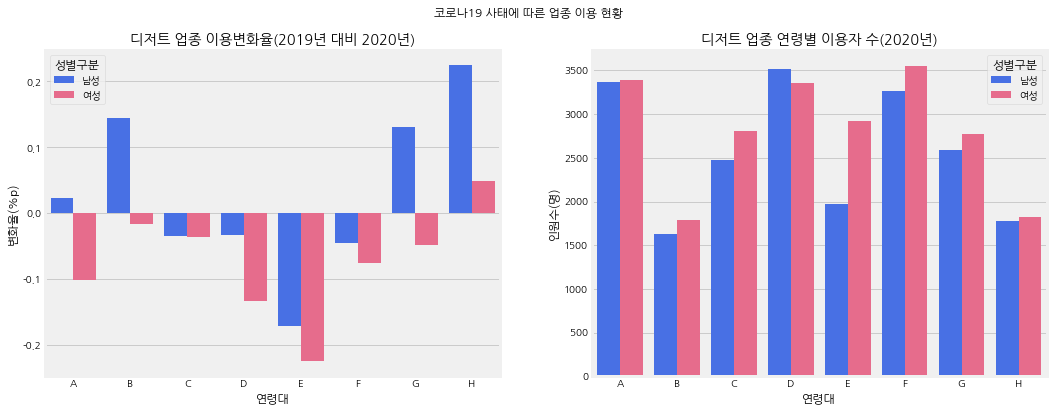

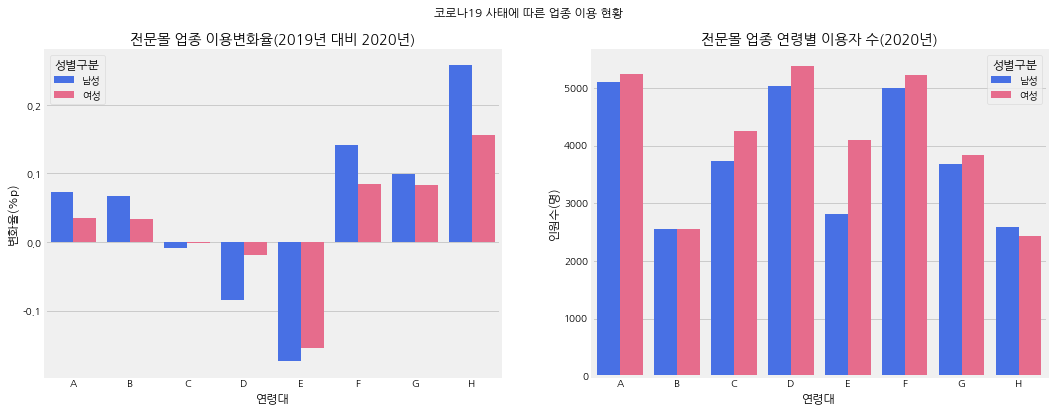

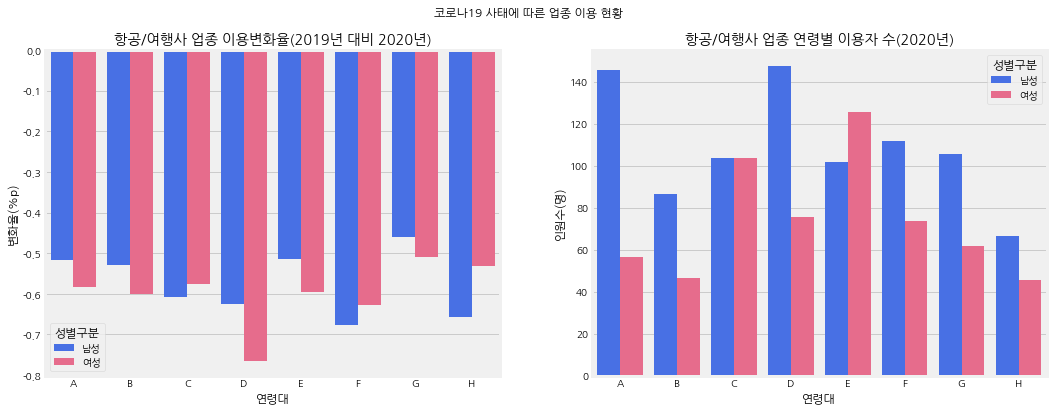

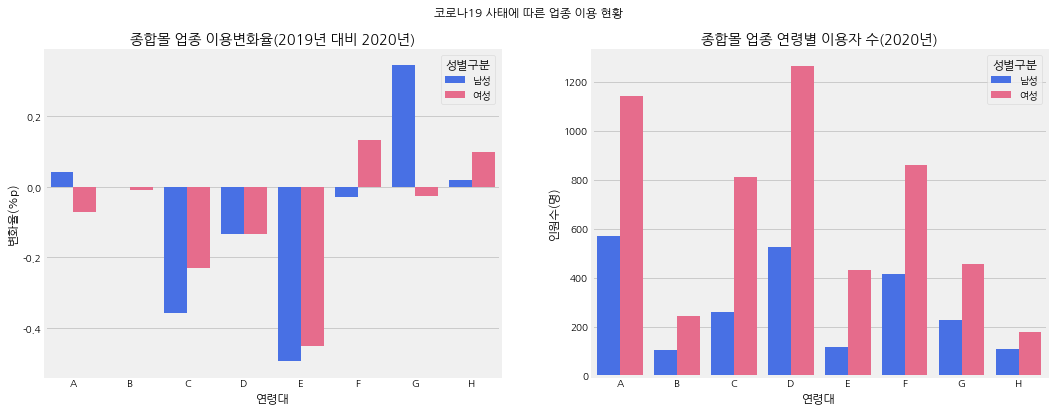

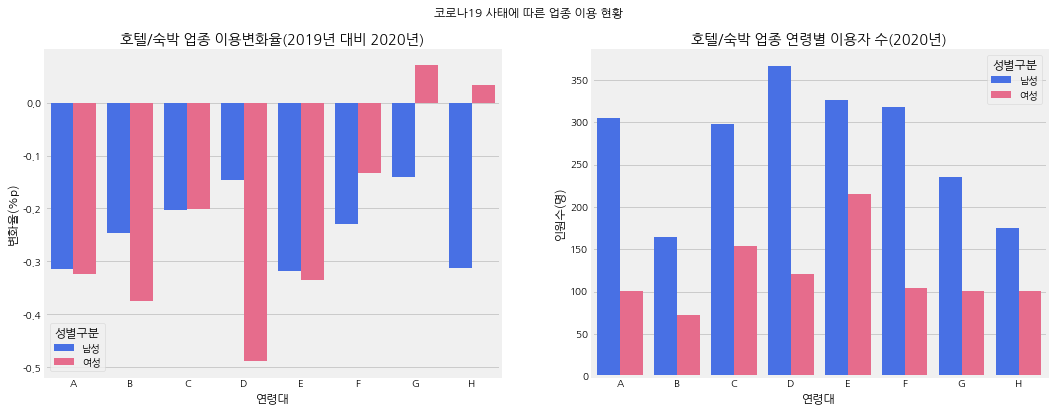

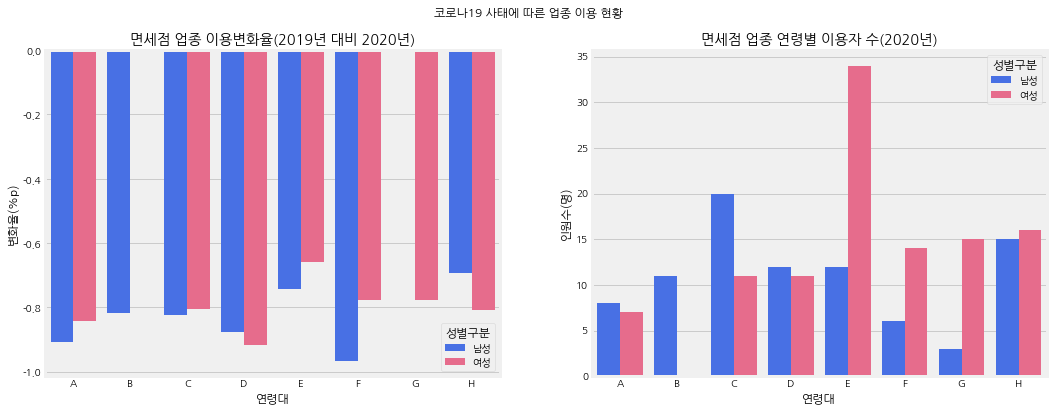

In [37]:
for c in trend_w_demo['Category'].unique().tolist():
    plotAnnualDiff(Category=c)

성별을 고려하지 않고 통으로 봐볼 필요도 있어보임

In [38]:
result = pd.DataFrame()
for c in trend_w_demo['Category'].unique():
    trendMale = trend_w_demo[trend_w_demo['성별구분']==0]
    trendFemale = trend_w_demo[trend_w_demo['성별구분']==1]

    trend2020 = trendMale[trendMale['YM'].isin([202005, 202006])]
    trend2019 = trendMale[trendMale['YM'].isin([201905, 201906])]
    tempMale = (trend2020[trend2020['Category']==c]['연령대'].value_counts() 
            / trend2019[trend2019['Category']==c]['연령대'].value_counts() - 1).to_frame('ratio').reset_index()
    tempMale['성별'] = '남성'
    trend2020 = trendFemale[trendFemale['YM'].isin([202005, 202006])]
    trend2019 = trendFemale[trendFemale['YM'].isin([201905, 201906])]
    tempFemale = (trend2020[trend2020['Category']==c]['연령대'].value_counts() 
            / trend2019[trend2019['Category']==c]['연령대'].value_counts() - 1).to_frame('ratio').reset_index()
    tempFemale['성별'] = '여성'
    temp = pd.concat([tempMale, tempFemale])
    temp = temp.groupby('성별')['ratio'].mean().to_frame().reset_index()
    temp['Category'] = c

    result = pd.concat([result, temp])

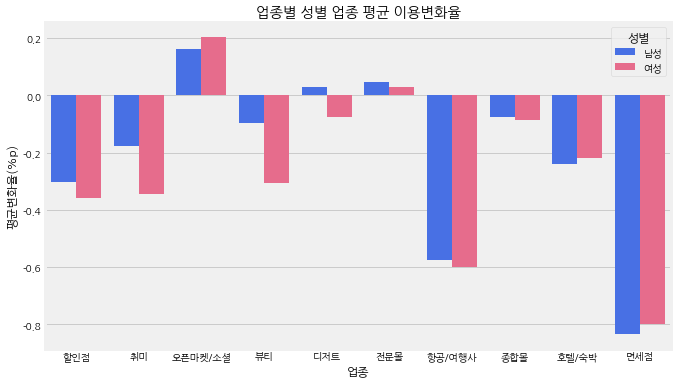

In [39]:
plt.figure(figsize=(10,6))
sns.barplot(x='Category', y='ratio', hue='성별', data=result, palette=colors)
plt.xlabel('업종')
plt.ylabel('평균변화율(%p)')
plt.title('업종별 성별 업종 평균 이용변화율')
plt.show()

호텔/숙박, 면세점, 전문몰을 제외한 모든 업종에서 여성이 코로나19사태에 더 민감한 반응을 보임

- 코로나19사태가 터짐에 따라, 각각 업종마다 변동이 심한 연령대/성별이 있는가 하면, 변동이 별로 없는 연령대/성별도 존재  
- 매출 상승하는 업종에서 매출을 더 올리기 위한 연령대/성별 마케팅? 가령, 오픈마켓/소셜 & 전문몰
- 매출 감소하는 업종에서 매출 손실을 감소시키기 위한 연령대/성별을 위한 마케팅?